In [ ]:
import pandas as pd
import re
import emoji
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
TS = pd.read_csv("TaylorSwift.csv")

In [ ]:
NM = pd.read_csv("NickiMinaj.csv")

In [ ]:
TS.head()

,tweets
0,Still buzzing from those 3 shows in Tampa!!! T...
1,Just had the wildest three nights in Arlington...
2,Last night in Vegas Marcus Mumford showed up a...
3,"Vegas, you were WILD. The crowd of childhood d..."
4,WELL. Last night was a rush. Thank you to ever...


In [ ]:
NM.head()

,tweets
0,I am https://t.co/GlNHdF9xaZ https://t.co/Ojlp...
1,�� https://t.co/cpBrf07HCJ
2,�� @kimpetras #Alone https://t.co/c1FeBIbSkQ h...
3,https://t.co/c1FeBIbSkQ @kimpetras 🎀
4,And will ALWAYS be the mf BARBZ for meeeeeee 🦄😘🫶🏽


In [ ]:
NM['tweets'].str.lower()
TS['tweets'].str.lower()


0      still buzzing from those 3 shows in tampa!!! t...
1      just had the wildest three nights in arlington...
2      last night in vegas marcus mumford showed up a...
3      vegas, you were wild. the crowd of childhood d...
4      well. last night was a rush. thank you to ever...
                             ...                        
665    new single #lookwhatyoumademedo out now. pre-o...
666                              https://t.co/xmbbukfzps
667                              https://t.co/xqhhdz0y7c
668                              https://t.co/12rfi8bso4
669                              https://t.co/p2dyy0e2m3
Name: tweets, Length: 670, dtype: object

In [ ]:
#Remove WhiteSpace characters
NM['tweets'].str.strip()
TS['tweets'].str.strip()


0      Still buzzing from those 3 shows in Tampa!!! T...
1      Just had the wildest three nights in Arlington...
2      Last night in Vegas Marcus Mumford showed up a...
3      Vegas, you were WILD. The crowd of childhood d...
4      WELL. Last night was a rush. Thank you to ever...
                             ...                        
665    New single #LookWhatYouMadeMeDo out now. Pre-o...
666                              https://t.co/xMBBukfZPs
667                              https://t.co/xqhhDZ0y7c
668                              https://t.co/12Rfi8bso4
669                              https://t.co/p2DyY0e2M3
Name: tweets, Length: 670, dtype: object

In [ ]:
#Remove Hashtags
pattern = r'#\w+'
NM['tweets'] = NM['tweets'].replace(to_replace=pattern, value='', regex=True)
TS['tweets'] = TS['tweets'].replace(to_replace=pattern, value='', regex=True)

In [ ]:
#Remove Mentions
pattern2 = r'@\w+'
NM['tweets'] = NM['tweets'].replace(to_replace=pattern2, value='', regex=True)
TS['tweets'] = TS['tweets'].replace(to_replace=pattern2, value='', regex=True)

In [ ]:
#Remove URLs
pattern3 = re.compile(r'https?://\S+')
NM['tweets'] = NM['tweets'].str.replace(pattern3, '')
TS['tweets'] = TS['tweets'].str.replace(pattern3, '')


In [ ]:
#Remove Emojis
pattern4 = re.compile("["
                     u"\U0001F600-\U0001F64F"  # emoticons
                     u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                     u"\U0001F680-\U0001F6FF"  # transport & map symbols
                     u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                     u"\U00002702-\U000027B0"
                     u"\U000024C2-\U0001F251"
                     "]+", flags=re.UNICODE)

NM['tweets'] = NM['tweets'].apply(lambda x: pattern4.sub('', x))
TS['tweets'] = TS['tweets'].apply(lambda x: pattern4.sub('', x))


In [ ]:
#Remove non-alphabetical characters
NM['tweets'] = NM['tweets'].str.replace(r'[^a-zA-Z\s]', '')
TS['tweets'] = TS['tweets'].str.replace(r'[^a-zA-Z\s]', '')


<ipython-input-12-5495ec1d3595>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  NM['tweets'] = NM['tweets'].str.replace(r'[^a-zA-Z\s]', '')
<ipython-input-12-5495ec1d3595>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  TS['tweets'] = TS['tweets'].str.replace(r'[^a-zA-Z\s]', '')


In [ ]:
vectorizer = CountVectorizer(stop_words='english')
#Transform the text data of the tweets column of the NM and TS dataframes into matrices of token counts
X_NM = vectorizer.fit_transform(NM['tweets'])
X_TS = vectorizer.fit_transform(TS['tweets'])

In [ ]:
X_NM

<2365x3692 sparse matrix of type '<class 'numpy.int64'>'
	with 13636 stored elements in Compressed Sparse Row format>

In [ ]:
X_TS

<670x2278 sparse matrix of type '<class 'numpy.int64'>'
	with 5453 stored elements in Compressed Sparse Row format>

In [ ]:
#Convert the matrix data into a 2D array
matrix_NM = X_NM.toarray()
matrix_TS = X_TS.toarray()

In [ ]:
word_freq_NM = dict(zip(vectorizer.vocabulary_.keys(), np.asarray(matrix_NM.sum(axis=0)).ravel()))
word_freq_NM = dict(sorted(word_freq_NM.items(), key=lambda x: x[1], reverse=True))


In [ ]:
word_freq_TS = dict(zip(vectorizer.vocabulary_.keys(), np.asarray(matrix_TS.sum(axis=0)).ravel()))
word_freq_TS = dict(sorted(word_freq_TS.items(), key=lambda x: x[1], reverse=True))


In [ ]:
wordcloud_NM = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(word_freq_NM)

In [ ]:
wordcloud_TS = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(word_freq_TS)

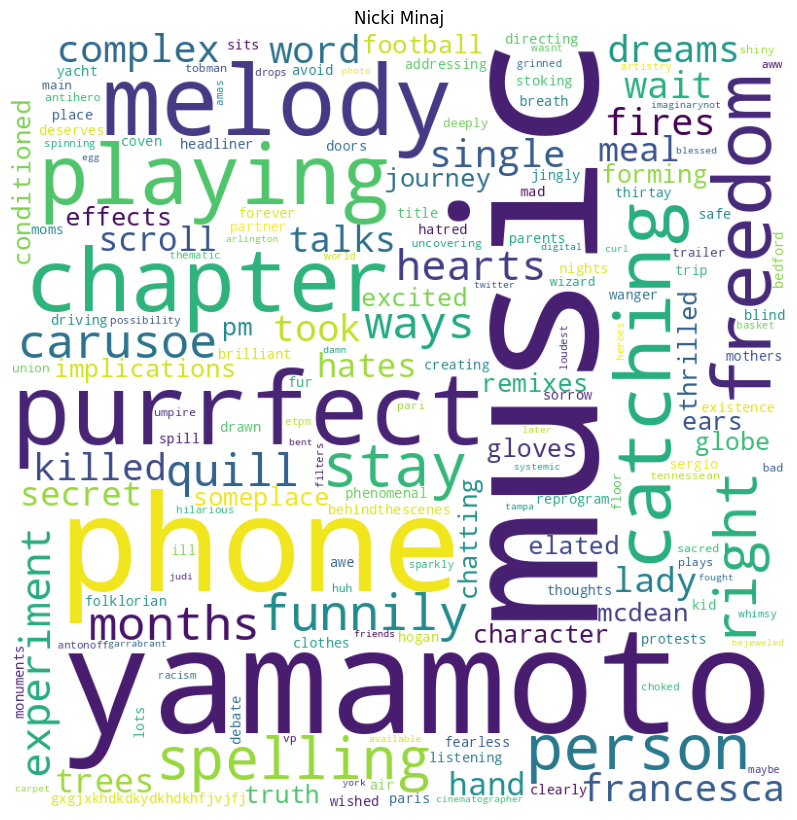

In [ ]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.title('Nicki Minaj')
plt.imshow(wordcloud_NM)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

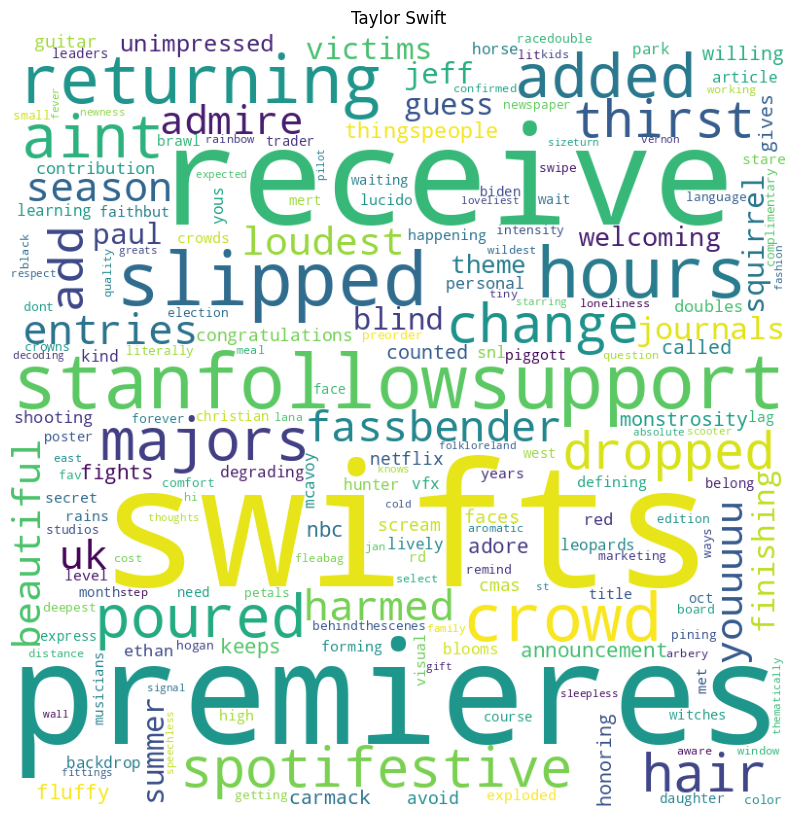

In [ ]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.title('Taylor Swift')
plt.imshow(wordcloud_TS)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

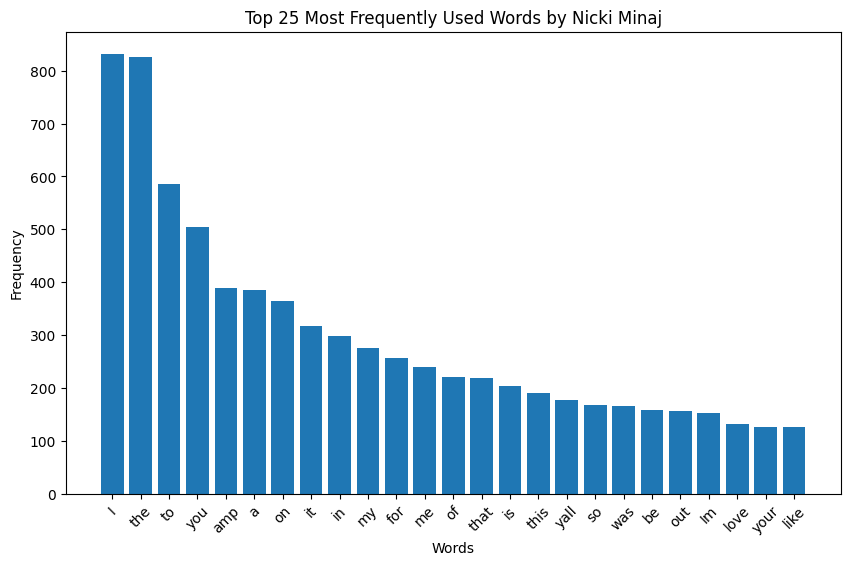

In [ ]:
word_freq = pd.Series(' '.join(NM['tweets']).split()).value_counts()

top_words = word_freq[:25]

plt.figure(figsize=(10, 6))
plt.bar(top_words.index, top_words.values)
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 25 Most Frequently Used Words by Nicki Minaj')
plt.show()



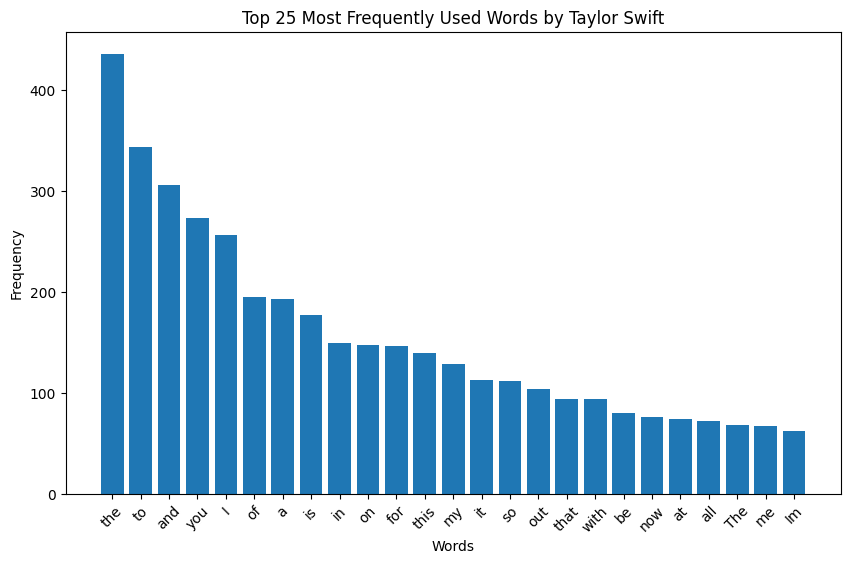

In [ ]:
word_freq = pd.Series(' '.join(TS['tweets']).split()).value_counts()

top_words = word_freq[:25]

plt.figure(figsize=(10, 6))
plt.bar(top_words.index, top_words.values)
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 25 Most Frequently Used Words by Taylor Swift')
plt.show()

In [ ]:
NM['tweeter'] = 'Nicki Minaj'
TS['tweeter'] = 'Taylor Swift'
#Combining the dataframes
data = pd.concat([NM,TS],ignore_index=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = vectorizer.fit_transform(data['tweets'])
y = data['tweeter']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
print('Model accuracy on test set:', model.score(X_test, y_test))

Model accuracy on test set: 0.871499176276771


In [ ]:
!pip install scikit-learn==0.24.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
coef_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'coef': model.coef_[0]})
coef_df = coef_df.sort_values('coef',ascending=False)

In [ ]:
print(coef_df)

                   term      coef
4105  stanfollowsupport  1.562265
2593              lover  1.552632
4344             thanks  1.498613
227           available  1.380713
1855              gonna  1.316510
...                 ...       ...
3009                 ok -1.303419
699                 chi -1.326430
245                babe -1.661168
286               barbz -1.808018
4935               yall -2.016164

[5000 rows x 2 columns]


In [ ]:
import seaborn as sns

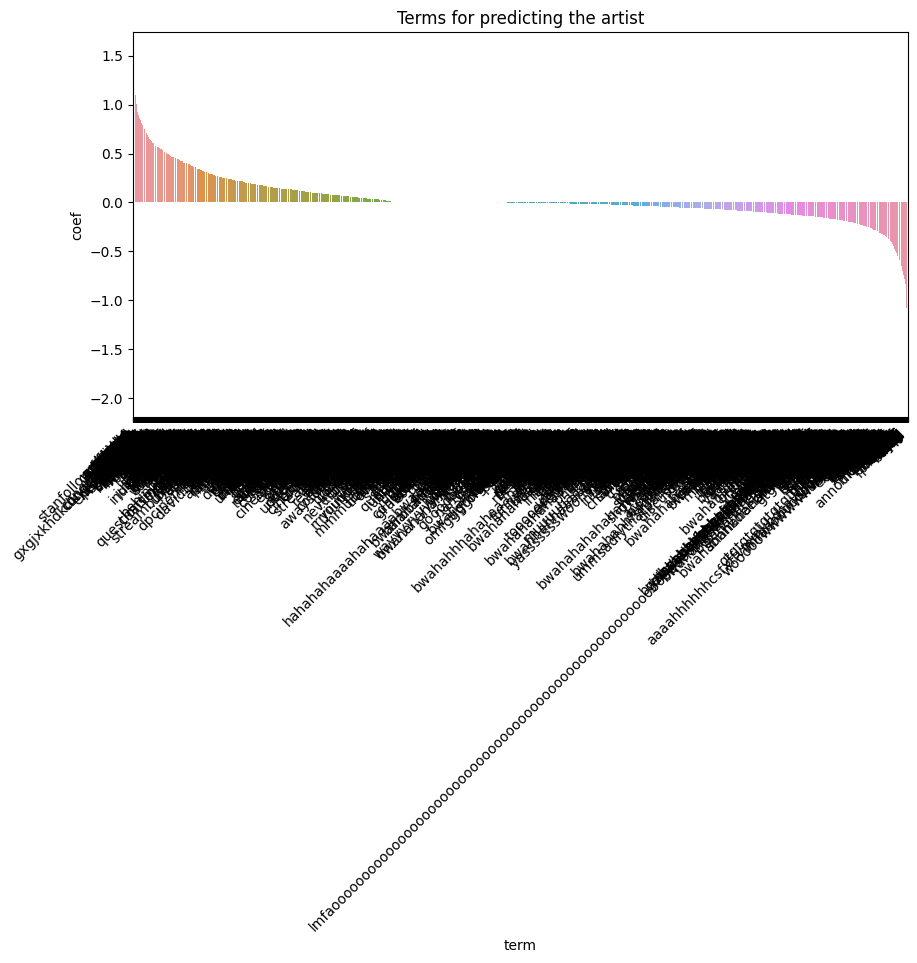

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='term', y='coef',data=coef_df)
plt.xticks(rotation=45, ha='right')
plt.title("Terms for predicting the artist")
plt.show()

y_pred = model.predict(X_test)

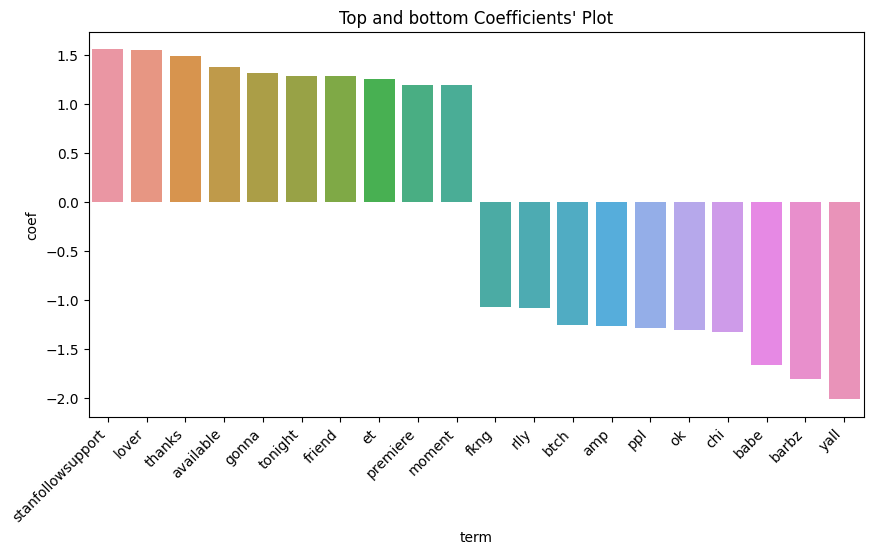

In [ ]:
plt.figure(figsize=(10,5))
top_coef = pd.concat([coef_df.head(10), coef_df.tail(10)])
sns.barplot(x='term', y='coef',data=top_coef)
plt.xticks(rotation=45, ha='right')
plt.title("Top and bottom Coefficients' Plot")
plt.show()




In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("test set accuracy:{:.2f}%".format(accuracy*100))

test set accuracy:87.15%
